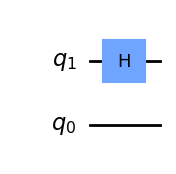

In [2]:
#Here we will be discussing about the operations of two qubits

#Importing dependencies
from qiskit import QuantumCircuit

#Creating the circuit
qc = QuantumCircuit(2)
qc.h(1)
display(qc.draw(output='mpl', reverse_bits = True))



In [6]:
#Now we want to see the result for H x I

#Simulation dependencies
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals = 3).data

for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(round(entry.real, 3)) + " "

    print(column)

0.707 0.0 0.707 0.0 
0.0 0.707 0.0 0.707 
0.707 0.0 -0.707 0.0 
0.0 0.707 0.0 -0.707 


The chosen controlled and the target qubits are:  1 4
The chosen controlled and the target qubits are:  3 0
The chosen controlled and the target qubits are:  0 4
The chosen controlled and the target qubits are:  3 1


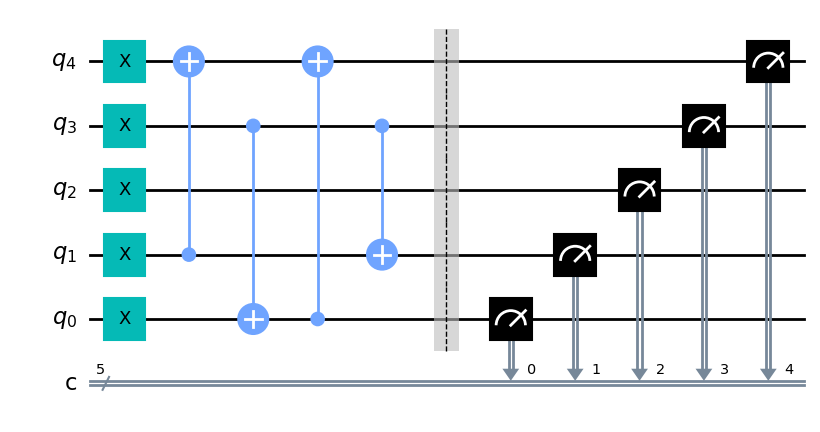

The measurement result is:  {'01100': 100}
our result is:  11111


In [11]:
#Now doing it for the cx gate

#Importing dependencies

from qiskit import QuantumRegister, ClassicalRegister, execute, Aer

#Importing random numbers

from random import randrange

n = 5
m = 4

states_of_qubits = []

q = QuantumRegister(n,"q")
c = ClassicalRegister(n, "c")

qc = QuantumCircuit(q,c)

#Now setting each of the qubit values to 1
for i in range(n):
    qc.x(q[i]) 
    states_of_qubits.append(1)

#Now randomly picking m pairs of qubits
for i in range(m):
    c_qubit = randrange(n)
    t_qubit = randrange(n)

    #To ensure the controller and the target qubits are different

    while c_qubit == t_qubit:
        t_qubit = randrange(n)
    
    print("The chosen controlled and the target qubits are: ", c_qubit, t_qubit)

    qc.cx(q[c_qubit],q[t_qubit])

    if states_of_qubits[c_qubit] == 1:
        states_of_qubits[t_qubit] == 1 - states_of_qubits[t_qubit]

#Measure the quantum register 
qc.barrier()
qc.measure(q,c)

#Drawing the circuit
display(qc.draw(output = 'mpl', reverse_bits= True))

#execute the circuit 100 times in the local simulator
job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 100)
counts = job.result().get_counts(qc)

print("The measurement result is: ", counts)

our_result = ""
for state in states_of_qubits:
    our_result = str(state) + our_result

print("our result is: ", our_result)

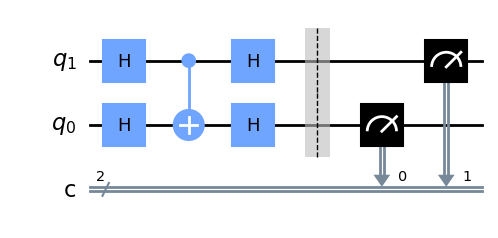

00 is mapped to {'00': 100}


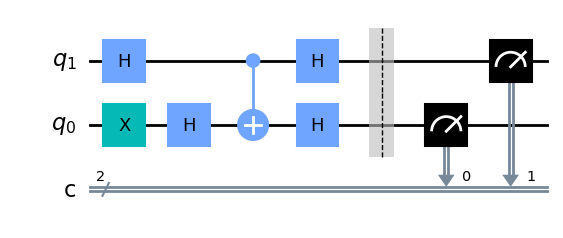

01 is mapped to {'11': 100}


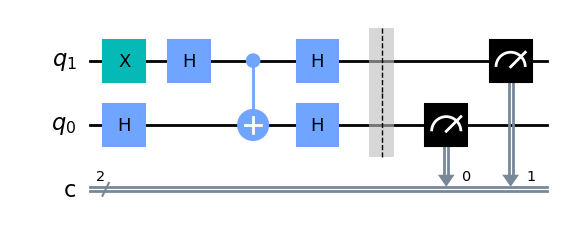

10 is mapped to {'10': 100}


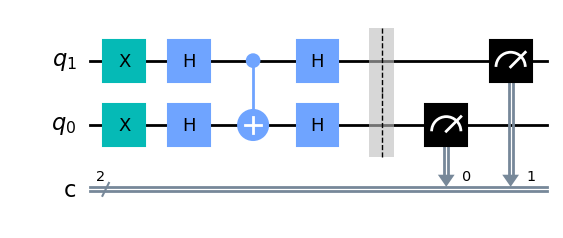

11 is mapped to {'01': 100}


In [13]:
#Now we have another task

#Importing dependencies
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs = ['00','01','10','11']

for input in all_inputs:
    q = QuantumRegister(2,"q")
    c = ClassicalRegister(2, "c")
    qc = QuantumCircuit(q,c)

    if input[0] == '1':
        qc.x(q[1])
    if input[1] == '1':
        qc.x(q[0])
    
    qc.h(q[0])
    qc.h(q[1])

    qc.cx(q[1],q[0])

    qc.h(q[0])
    qc.h(q[1])

    #Measuring both the qubits
    qc.barrier()
    qc.measure(q,c)

    display(qc.draw(output='mpl',reverse_bits=True))
    
    # execute the circuit 100 times in the local simulator
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)

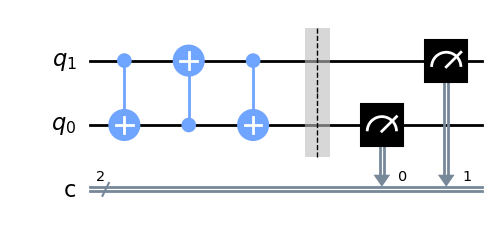

00 is mapped to  {'00': 1000}


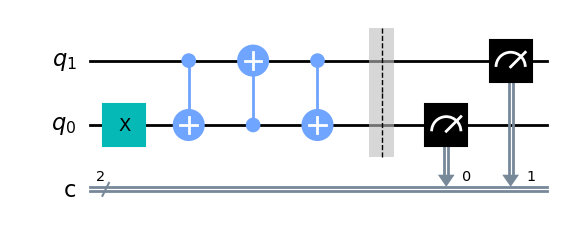

01 is mapped to  {'10': 1000}


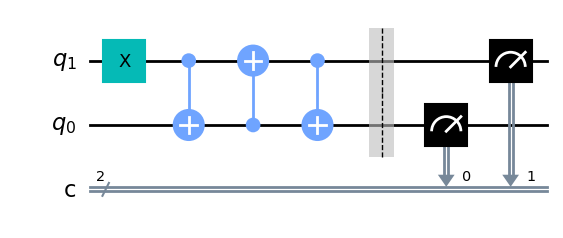

10 is mapped to  {'01': 1000}


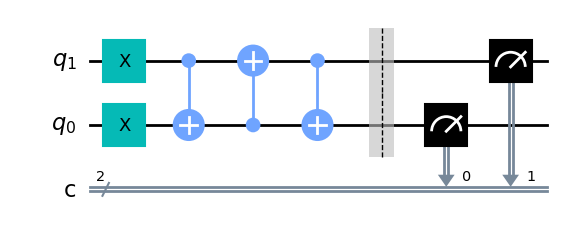

11 is mapped to  {'11': 1000}


In [14]:
#This time we will use all the CNOT gates

#Importing the dependencies
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs = ['00','01','10','11']

for input in all_inputs:
    q = QuantumRegister(2,"q")
    c = ClassicalRegister(2,"c")
    qc =   QuantumCircuit(q,c)

    if input[0] == '1':
        qc.x(q[1])
    if input[1] == '1':
        qc.x(q[0])

    #Applying the control not gates
    qc.cx(q[1],q[0])
    qc.cx(q[0],q[1])
    qc.cx(q[1],q[0])

    qc.barrier()
    qc.measure(q,c)

    #Drawing the circuit
    display(qc.draw(output = 'mpl', reverse_bits= True))

    #Running the circuit
    job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 1000)
    counts = job.result().get_counts(qc)
    print(input, "is mapped to ", counts)

